# Timeseries

This notebook shows how to use the timeseries diagnostic. Here we focus on the Timeseries and the Gregory Plot functionalities.

The `Timeseries` class provides an easy interface to plot gloabl time series for a given list of experiments and a variable or formula.

In [1]:
from aqua.diagnostics.timeseries import Timeseries

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [2]:
ts = Timeseries(var='2t', models='IFS-NEMO', exps='historical-1990', sources='lra-r100-monthly',
                startdate='1990-01-01', enddate='1999-12-01',
                std_startdate='1990-01-01', std_enddate='1999-12-01', extend=False,
                loglevel='INFO')

By default the `Timeseries` class will use `ERA5` as the reference dataset, but you can change it by setting the `plot_ref_kw` parameter to the desired dataset.

The timeseries is generated, plot and saved by running the `run` method of the `Timeseries` class.
By default monthly and annual mean are evaluated, but you can change it by setting the parameter to `monthly=False` or `annual=False`.
The reference data can be plotted by setting the `plot_ref=True` parameter.

2024-09-17 16:30:35 :: Timeseries :: INFO     -> Retrieving data for None IFS-NEMO historical-1990 lra-r100-monthly
2024-09-17 16:30:36 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2024-09-17 16:30:36 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-17 16:30:36 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-17 16:30:36 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-17 16:30:36 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-17 16:30:36 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-09-17 16:30:36 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-09-17 16:30:36 :: Reader :: WARNING  -> No fi

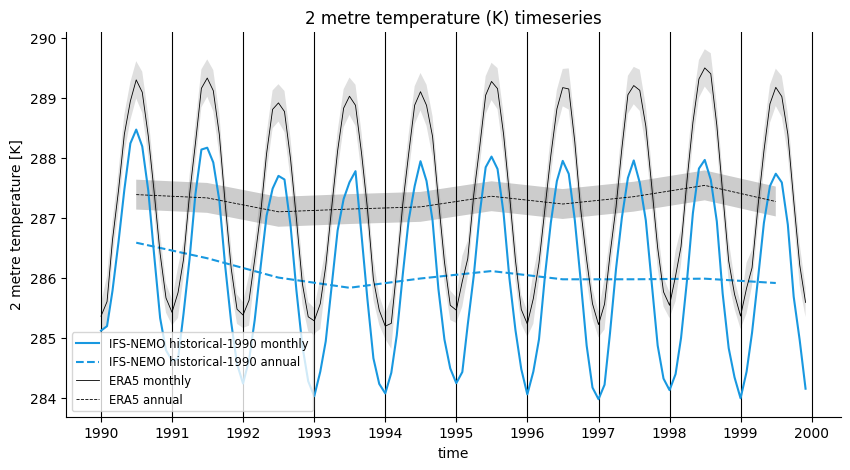

In [3]:
ts.run()

Furthermore, the user can also combine time series and plot them against each other. The resulting "Gregory"-like plot allows the user to investigate the annual cycle as well as to detect model drift (if existing).

In [5]:
from aqua.diagnostics.timeseries import GregoryPlot

Also in this case we have a simple class defined. The `GregoryPlot` class provides an easy interface to plot the Gregory-like plot for a given list of experiments.

The comparison is done against ERA5 for the 2m temperature and CERES for the TOA net fluxes.

By default both monthly and annual cycles are plotted, but the user can choose to plot only one of them by setting the `monthly` and `annual` parameters to `True` or `False`.

In [6]:
gp = GregoryPlot(models=['ICON','ICON'], exps=['historical-1990', 'ssp370'], sources=['lra-r100-monthly', 'lra-r100-monthly'],
            loglevel='INFO', monthly=False, annual=True)

2024-09-17 16:31:54 :: Gregory plot :: INFO     -> Retrieving data for None ICON historical-1990 lra-r100-monthly
2024-09-17 16:31:54 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2024-09-17 16:31:54 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-17 16:31:54 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-17 16:31:54 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-17 16:31:54 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-17 16:31:55 :: Reader :: INFO     -> Fix names in metadata is icon-destine-v1-hist-lra
2024-09-17 16:31:55 :: Reader :: INFO     -> Fix names icon-destine-v1-hist-lra found in fixes files
2024-09-17 16:31:55 :: Reader :: INFO     -> Parent fix icon-destine-v1 found! Mergin with fixer

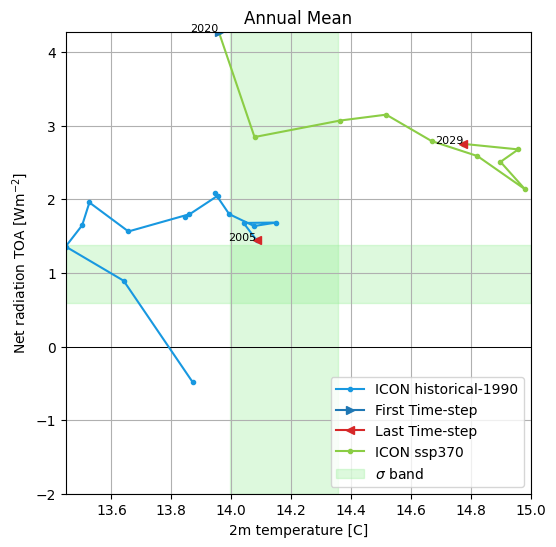

In [7]:
gp.run()

For the `Timeseries` class it is possible to select an area over which to calculate the timeseries. This is done with the `lon_limits` and `lat_limits` parameters.

In [8]:
ts_area = Timeseries(var='2t', models='IFS-NEMO', exps='historical-1990', sources='lra-r100-monthly',
                     startdate='1990-01-01', enddate='1999-12-01',
                     std_startdate='1990-01-01', std_enddate='1999-12-01', extend=False,
                     lat_limits=[-20, 20],
                     loglevel='INFO')

2024-09-17 16:33:25 :: Timeseries :: INFO     -> Retrieving data for None IFS-NEMO historical-1990 lra-r100-monthly
2024-09-17 16:33:25 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2024-09-17 16:33:25 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-17 16:33:25 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-17 16:33:25 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-17 16:33:25 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-17 16:33:25 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-09-17 16:33:25 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-09-17 16:33:25 :: Reader :: WARNING  -> No fi

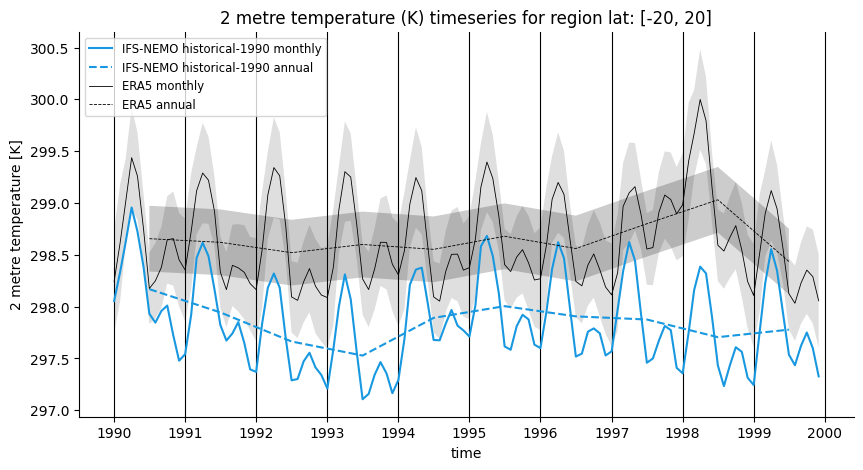

In [9]:
ts_area.run()